<a href="https://colab.research.google.com/github/mohammednawaz5111/nawaz5143/blob/main/AIinternipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import cv2  # OpenCV for image processing
import numpy as np  # For numerical operations
from sklearn.decomposition import PCA  # For PCA
from sklearn.neural_network import MLPClassifier  # For Artificial Neural Network
from sklearn.model_selection import train_test_split  # For splitting dataset
from sklearn.metrics import accuracy_score  # For calculating accuracy
import joblib  # For saving and loading models


In [39]:
def load_face_dataset(dataset_path):
    faces_path = os.path.join(dataset_path, "dataset", "faces")
    images = []
    labels = []
    label_map = {}
    current_label = 0

    for folder in os.listdir(faces_path):
        folder_path = os.path.join(faces_path, folder)
        if os.path.isdir(folder_path):  # Ensure it's a directory
            label_map[current_label] = folder  # Map label ID to folder name
            for img_file in os.listdir(folder_path):
                img_path = os.path.join(folder_path, img_file)
                image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if image is not None:
                    resized_image = cv2.resize(image, (100, 100))  # Resize to 100x100 pixels
                    images.append(resized_image.flatten())  # Flatten image to 1D
                    labels.append(current_label)
                else:
                    print(f"Warning: Failed to load {img_path}")
            current_label += 1
    return images, labels, label_map


In [40]:
# Convert images to a numpy array
X = np.array(images)

# Apply PCA to reduce the dimensionality of the images (e.g., to 50 components)
n_components = 50  # You can vary this value later to see its effect on accuracy
pca = PCA(n_components=n_components, whiten=True, random_state=42)
X_pca = pca.fit_transform(X)  # Transform the images into the reduced space


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, labels, test_size=0.4, random_state=42)


In [42]:
# Initialize and train the neural network classifier
ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
ann.fit(X_train, y_train)


MLPClassifier(max_iter=500, random_state=42)

In [43]:
y_pred = ann.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification accuracy: {accuracy * 100:.2f}%")


Classification accuracy: 62.22%


In [44]:
new_image_path = "PP (1).jpeg"  # Replace with your uploaded imposter image

# Load the image in grayscale
new_image = cv2.imread(new_image_path, cv2.IMREAD_GRAYSCALE)

if new_image is None:
    print(f"Error: Could not load image from {new_image_path}")
else:
    # Resize the image to 100x100 and flatten it
    new_image_resized = cv2.resize(new_image, (100, 100)).flatten()

    # Apply PCA transformation to reduce the features to 50 (same as during training)
    new_image_pca = pca.transform([new_image_resized])

    # Predict using the trained ANN model
    predicted_probabilities = ann.predict_proba(new_image_pca)

    # Threshold for rejection: If the highest probability is below 0.7, reject as "Unknown"
    if np.max(predicted_probabilities) < 0.7:
        print("Imposter rejected: Unknown person")
    else:
        predicted_label = np.argmax(predicted_probabilities)
        predicted_name = label_map.get(predicted_label, "Unknown")
        print(f"Predicted name: {predicted_name}")


Predicted name: Aamir


In [45]:
joblib.dump(pca, 'pca_model.pkl')
joblib.dump(ann, 'ann_model.pkl')


['ann_model.pkl']

In [46]:
pca = joblib.load('pca_model.pkl')
ann = joblib.load('ann_model.pkl')


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


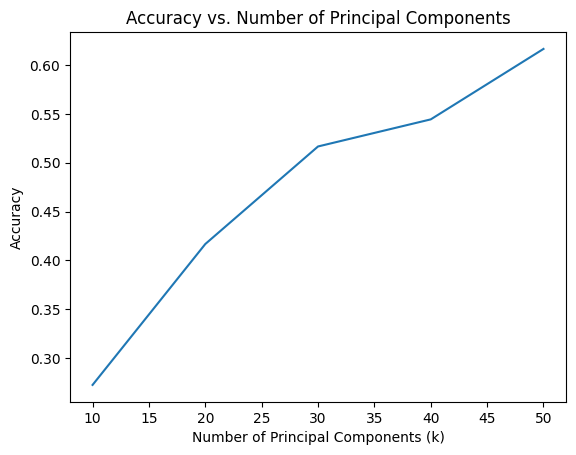

Final accuracy with 30 components: 51.67%


In [47]:
####Experiment with Different PCA Components (Optional)
k_values = range(10, 51, 10)  # Test with different k values from 10 to 50
accuracies = []

for k in k_values:
    pca = PCA(n_components=k, whiten=True, random_state=42)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
    ann.fit(X_train_pca, y_train)
    y_pred = ann.predict(X_test_pca)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(k_values, accuracies)
plt.xlabel('Number of Principal Components (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Principal Components')
plt.show()

# Select optimal k based on the graph and retrain with that k
optimal_k = 30  # Replace with the optimal k you found
pca = PCA(n_components=optimal_k, whiten=True, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, solver='adam', random_state=42)
ann.fit(X_train_pca, y_train)

# Evaluate on the test set
y_pred = ann.predict(X_test_pca)
final_accuracy = accuracy_score(y_test, y_pred)
print(f"Final accuracy with {optimal_k} components: {final_accuracy * 100:.2f}%")


In [48]:
####10: Improve Model Performance
# Example of a deeper network with more neurons
ann = MLPClassifier(hidden_layer_sizes=(200, 100), max_iter=1000, solver='adam', alpha=0.001, random_state=42)
ann.fit(X_train_pca, y_train)



MLPClassifier(alpha=0.001, hidden_layer_sizes=(200, 100), max_iter=1000,
              random_state=42)

In [51]:
from sklearn.decomposition import PCA

# Flatten all training images to 10,000 features
X_train_flattened = np.array([img.flatten() for img in images])

# Apply PCA to reduce dimensions to 50 components
pca = PCA(n_components=50, whiten=True, random_state=42)
X_train_pca = pca.fit_transform(X_train_flattened)

print(f"PCA trained. Input features reduced to {pca.n_components_} components.")


PCA trained. Input features reduced to 50 components.


In [52]:
from sklearn.model_selection import train_test_split

# Use PCA-reduced features (X_pca) for splitting
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, labels, test_size=0.4, random_state=42)

print(f"Training samples: {len(X_train_pca)}, Testing samples: {len(X_test_pca)}")


Training samples: 270, Testing samples: 180


In [53]:
from sklearn.neural_network import MLPClassifier

# Initialize and train the neural network on PCA-reduced data
ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
ann.fit(X_train_pca, y_train)

print("ANN trained on PCA-reduced features.")


ANN trained on PCA-reduced features.


In [54]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred = ann.predict(X_test_pca)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification accuracy: {accuracy * 100:.2f}%")

# Display classification report
print(classification_report(y_test, y_pred, target_names=list(label_map.values())))


Classification accuracy: 62.22%
              precision    recall  f1-score   support

        Alia       0.64      0.29      0.40        24
       Disha       0.57      0.62      0.59        21
     Amitabh       0.79      0.90      0.84        21
     Deepika       0.40      0.44      0.42        18
      Akshay       0.50      0.69      0.58        16
      Ileana       0.41      0.71      0.52        17
        Ajay       0.85      0.73      0.79        15
      Farhan       0.82      0.75      0.78        24
       Aamir       0.81      0.54      0.65        24

    accuracy                           0.62       180
   macro avg       0.64      0.63      0.62       180
weighted avg       0.65      0.62      0.62       180



In [55]:
import joblib

# Save PCA and ANN models
joblib.dump(pca, "pca_model.pkl")
joblib.dump(ann, "ann_model.pkl")

print("Models saved successfully!")


Models saved successfully!


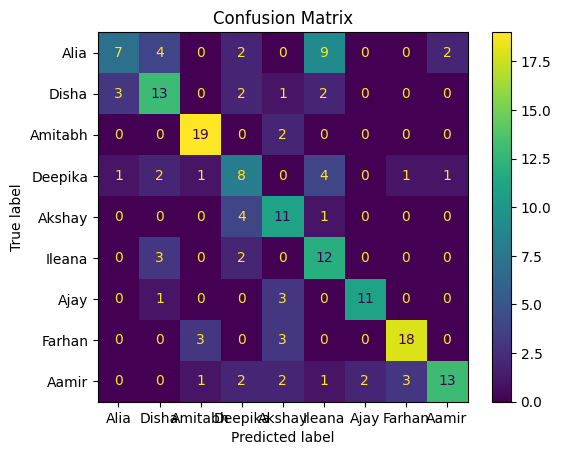

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=list(label_map.keys()))

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(label_map.values()))
disp.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()


In [57]:
ann = MLPClassifier(hidden_layer_sizes=(200, 100), max_iter=1000, solver='adam', random_state=42)
ann.fit(X_train_pca, y_train)

# Evaluate the model
y_pred = ann.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Updated Classification Accuracy: {accuracy * 100:.2f}%")


Updated Classification Accuracy: 63.89%


In [58]:
ann = MLPClassifier(hidden_layer_sizes=(200, 100), max_iter=1000, solver='adam', random_state=42)
ann.fit(X_train_pca, y_train)

# Evaluate the model
y_pred = ann.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Updated Classification Accuracy: {accuracy * 100:.2f}%")


Updated Classification Accuracy: 63.89%


In [59]:
import joblib

# Save PCA and ANN models
joblib.dump(pca, "pca_model.pkl")
joblib.dump(ann, "ann_model.pkl")

print("Models saved successfully!")


Models saved successfully!


In [61]:
from sklearn.neural_network import MLPClassifier

# Update ANN model with new configuration
ann = MLPClassifier(
    hidden_layer_sizes=(200, 100),  # Increase neurons and layers
    max_iter=1000,  # Allow more iterations
    solver='adam',  # Keep the Adam optimizer
    learning_rate_init=0.001,  # Specify learning rate
    random_state=42
)

# Retrain the model
ann.fit(X_train_pca, y_train)

# Evaluate on the test set
y_pred = ann.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Updated Classification Accuracy: {accuracy * 100:.2f}%")


Updated Classification Accuracy: 63.89%


In [62]:
from google.colab import files

uploaded = files.upload()  # Upload imposter images
print(uploaded)  # This will print the names of the uploaded files


Saving PP.jpeg to PP (2).jpeg
{'PP (2).jpeg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xe1\x02rExif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x04GF\x00\x03\x00\x00\x00\x01\x00\x04\x00\x00GI\x00\x03\x00\x00\x00\x01\x00K\x00\x00\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x01J\xea\x1c\x00\x07\x00\x00\x01\x0c\x00\x00\x00>\x00\x00\x00\x00\x1c\xea\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [63]:
imposter_images = list(uploaded.keys())  # List of uploaded imposter image filenames
threshold = 0.7  # Confidence threshold for rejection

for imposter_image_path in imposter_images:
    imposter_image = cv2.imread(imposter_image_path, cv2.IMREAD_GRAYSCALE)

    if imposter_image is None:
        print(f"Error: Could not load image from {imposter_image_path}")
    else:
        imposter_resized = cv2.resize(imposter_image, (100, 100)).flatten()  # Flatten to 10,000 features
        imposter_pca = pca.transform([imposter_resized])  # Transform to 50 components

        predicted_probabilities = ann.predict_proba(imposter_pca)  # Get probabilities
        max_prob = np.max(predicted_probabilities)  # Get the highest confidence

        if max_prob < threshold:  # Reject if confidence is below threshold
            print(f"Imposter {imposter_image_path} rejected as Unknown")
        else:
            predicted_label = np.argmax(predicted_probabilities)
            predicted_name = label_map.get(predicted_label, "Unknown")
            print(f"Imposter {imposter_image_path} classified as: {predicted_name}")


Imposter PP (2).jpeg rejected as Unknown


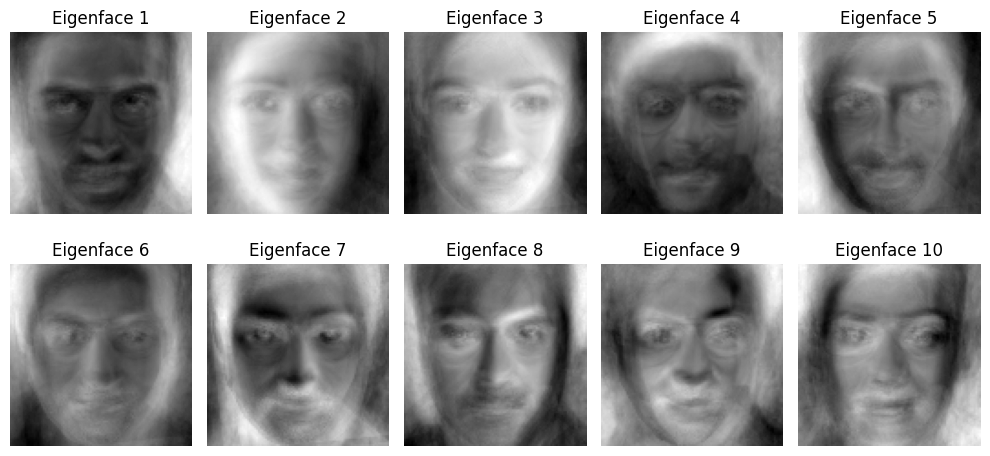

In [64]:
import matplotlib.pyplot as plt

# Generate eigenfaces
eigenfaces = pca.components_.reshape((pca.n_components_, 100, 100))

# Plot the first 10 eigenfaces
plt.figure(figsize=(10, 5))
for i in range(10):  # Adjust the number to display more eigenfaces
    plt.subplot(2, 5, i + 1)
    plt.imshow(eigenfaces[i], cmap='gray')
    plt.title(f'Eigenface {i+1}')
    plt.axis('off')
plt.tight_layout()
plt.show()


In [66]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of original PCA-transformed data: {X_pca.shape}")


Shape of X_train: (270, 50)
Shape of original PCA-transformed data: (450, 50)


In [67]:
# Use the original data (X) before PCA transformation
signatures = pca.transform(X)  # Apply PCA to the original 10,000-feature data
print("Signature for the first image:", signatures[0])


Signature for the first image: [-0.4931485  -0.30337837  1.35865001  1.28337536 -0.86664369 -1.38382601
 -0.01042009  2.8156377   0.44565449 -0.08422614 -1.1137662  -1.64347171
 -0.50848437  0.35903538 -0.66712652  1.56165408  1.55527528  0.67530536
  0.44427714  2.14165894 -0.19026072  0.06139486  1.02031553  0.08208991
  0.08049452  0.76369058 -0.06747954  0.37446592 -1.12671217 -0.94064615
  0.54928576 -0.5418978  -0.23267186  0.34088606  0.28042842 -0.22200985
 -0.58728006  0.8568872   1.21438289  0.23143009  0.27718068  0.52892633
 -1.52013487  1.84730046 -0.26855325  1.21253194  0.61107905 -0.14905546
 -1.30737437  0.72588037]


In [68]:
pca = PCA(n_components=50, whiten=True, random_state=42)
X_pca = pca.fit_transform(X)  # Transform original data


In [69]:
# Ensure PCA is applied to the original feature space
signatures = pca.transform(X)  # X should have shape (N, 10000)
print("Signature for the first image:", signatures[0])

# Verify the shape of signatures
print(f"Shape of signatures: {signatures.shape}")  # Should be (N, 50)


Signature for the first image: [-0.4931485  -0.30337837  1.35865001  1.28337536 -0.86664369 -1.38382601
 -0.01042009  2.8156377   0.44565449 -0.08422614 -1.1137662  -1.64347171
 -0.50848437  0.35903538 -0.66712652  1.56165408  1.55527528  0.67530536
  0.44427714  2.14165894 -0.19026072  0.06139486  1.02031553  0.08208991
  0.08049452  0.76369058 -0.06747954  0.37446592 -1.12671217 -0.94064615
  0.54928576 -0.5418978  -0.23267186  0.34088606  0.28042842 -0.22200985
 -0.58728006  0.8568872   1.21438289  0.23143009  0.27718068  0.52892633
 -1.52013487  1.84730046 -0.26855325  1.21253194  0.61107905 -0.14905546
 -1.30737437  0.72588037]
Shape of signatures: (450, 50)


In [70]:
print(f"PCA expects input features: {pca.n_features_in_}")


PCA expects input features: 10000
